In [66]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/software/csg/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [67]:
from astropy.utils.data import download_file

In [68]:
from astropy.io import fits

In [69]:
image_file = '../datasets/sm/example.fits'

In [70]:
hdu_list = fits.open(image_file)
hdu_list.info()
# Gaia SM images are binned by 2 in AC direction( hence AC dim = 990 )
# Gaia SM images are binned by 2 in AL direction( hence AL dim = 2543 )

Filename: ../datasets/sm/example.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      19   (990, 2543)   int16 (rescales to uint16)   
1    AC_COORDINATES  ImageHDU        11   (990, 2543)   int16   
2    AC_BINNING  ImageHDU        11   (990, 2543)   int16   
3    TDI_TTAG    ImageHDU         9   (2543,)      int64   
4    CI_BIT      ImageHDU         9   (2543,)      uint8   
5    TDI_GATE    ImageHDU         9   (2543,)      int16   
6    IDLE_BIT    ImageHDU         9   (2543,)      uint8   
7    TEST_PATTERN_BIT  ImageHDU         9   (2543,)      uint8   
8    OPEXIT_BIT  ImageHDU         9   (2543,)      uint8   
9    STATUS_BIT  ImageHDU         9   (2543,)      int32   
10   OBMT        ImageHDU         9   (2543,)      int64   


In [71]:
image_data = hdu_list[0].data

In [72]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(2543, 990)


In [73]:
hdu_list.close()

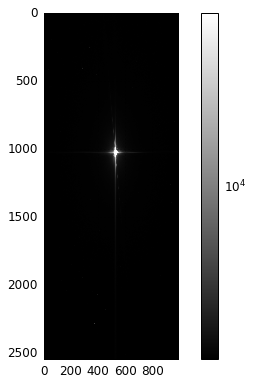

In [74]:
from matplotlib.colors import LogNorm
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.colorbar()
# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [64]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 0
Max: 65535
Mean: 1606.48778862
Stdev: 1510.70487046


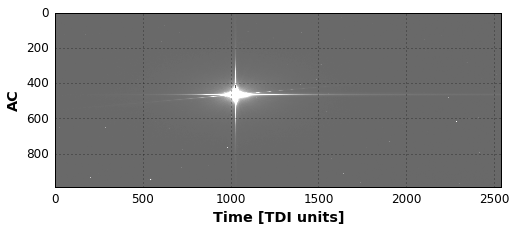

In [92]:
# Rotate and Strech color
import scipy
from scipy import ndimage
rotated_img = scipy.ndimage.rotate(image_data, 90)
plt.xlabel('Time [TDI units]')
plt.ylabel('AC')
plt.imshow(rotated_img, cmap='gray', vmin=512, vmax=3000)


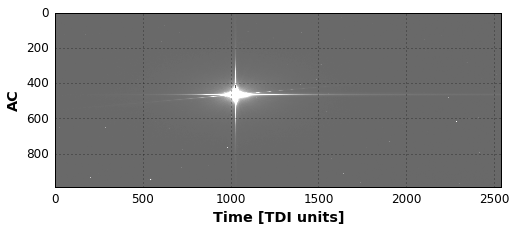

In [93]:
# Interactive Plot
plt.ion()
ax=plt.gca()
ax.imshow(rotated_img, cmap='gray', vmin=512, vmax=3000)
plt.xlabel('Time [TDI units]')
plt.ylabel('AC')
plt.draw()